# 🧠 Titanic Survival Prediction - Machine Learning Model

In this project, we use supervised machine learning to predict whether a passenger on the Titanic would survive, based on features such as gender, class, and age. We use the Logistic Regression and Decision Tree models from Scikit-learn.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")


## 📥 Load & Inspect Data
We use the same `train.csv` dataset from the Titanic Kaggle challenge.


In [45]:
# Use raw string to avoid backslash issues
df = pd.read_csv(r'D:\Python Projects\titanic\train.csv')

# Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🧹 Data Cleaning & Preprocessing

We handle missing values, drop irrelevant features, and encode categorical columns.


In [47]:
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin, Ticket, Name, PassengerId
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)


## 🔤 Encoding Categorical Variables

We use Label Encoding for 'Sex' and 'Embarked'.


In [49]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])          # male = 1, female = 0
df['Embarked'] = le.fit_transform(df['Embarked'])  # S, C, Q → 2, 0, 1


## 🧠 Feature Selection

We select input features (X) and target label (y).


In [51]:
X = df.drop('Survived', axis=1)
y = df['Survived']


## 📊 Split Data into Train & Test Sets
We use 80% of the data for training and 20% for testing.


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


## 🤖 Model 1: Logistic Regression

We train and evaluate a logistic regression model.


In [55]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## 🌳 Model 2: Decision Tree Classifier

We also try a Decision Tree classifier for comparison.


In [57]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7821229050279329

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



## 📉 Confusion Matrix
Visualize model performance.


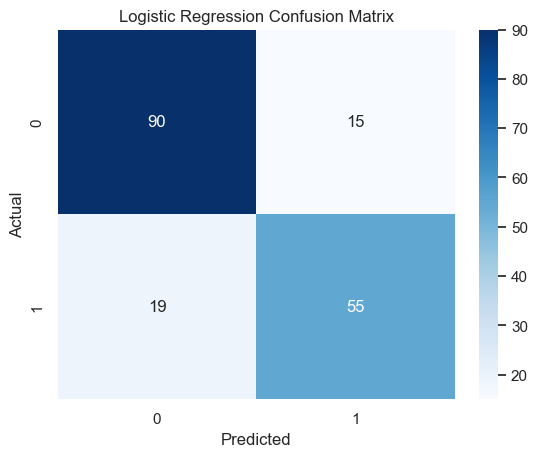

In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ✅ Conclusion

- Logistic Regression and Decision Tree models were trained to predict Titanic passenger survival.
- Gender, class, age, and embarkation point played significant roles in survival outcomes.
- Logistic Regression gave a more balanced classification, while Decision Tree offered high flexibility.

This project sets the foundation for more advanced modeling such as ensemble learning, hyperparameter tuning, or deployment.


## 🔮 Predicting Survival on Test Data


In [63]:
# Load test data
test_df = pd.read_csv(r'D:\Python Projects\titanic\test.csv')
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
from sklearn.preprocessing import LabelEncoder

# Encode only if not already numeric
if test_df['Sex'].dtype == 'object':
    le = LabelEncoder()
    le.fit(['male', 'female'])
    test_df['Sex'] = le.transform(test_df['Sex'])

if test_df['Embarked'].dtype == 'object':
    le_embarked = LabelEncoder()
    le_embarked.fit(['S', 'C', 'Q'])
    test_df['Embarked'] = le_embarked.transform(test_df['Embarked'])

# Fill missing values
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Drop unnecessary columns
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)


In [67]:
print(test_df['Sex'].unique())
print(test_df['Embarked'].unique())


[1 0]
[1 2 0]


In [71]:
import pandas as pd

# Load training data
train_df = pd.read_csv("D:/Python Projects/titanic/train.csv")

# Drop unnecessary columns
train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
train_df['Sex'] = le_sex.fit_transform(train_df['Sex'])

le_embarked = LabelEncoder()
train_df['Embarked'] = le_embarked.fit_transform(train_df['Embarked'])


In [73]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Train a Model (RandomForest or LogisticRegression)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Validate
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))


Validation Accuracy: 0.8268156424581006


Make Predictions on test_df


In [77]:
predictions = model.predict(test_df)


C:\Users\Sparta Laptop\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


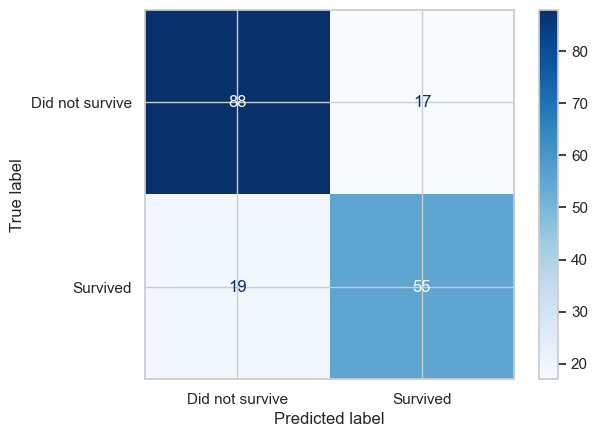

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_val is true labels and y_pred is predicted
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived'])
disp.plot(cmap='Blues')


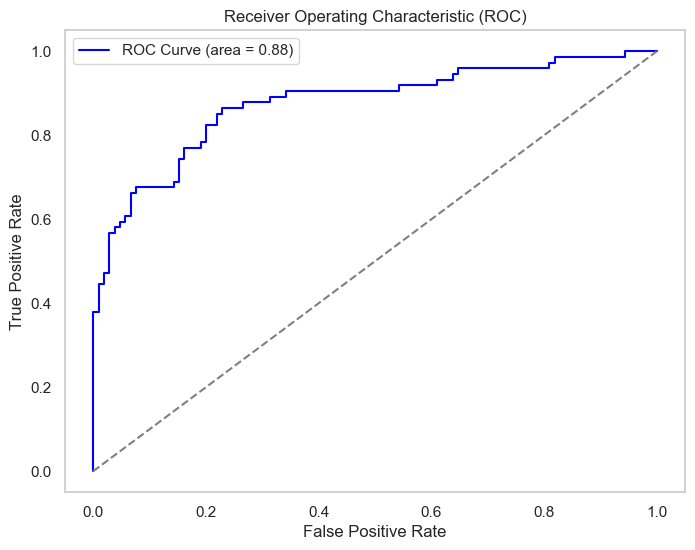

In [81]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_val)[:, 1]  # Probability of survival

fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid()
plt.show()


Bar Plot of Survival Predictions (on test set)

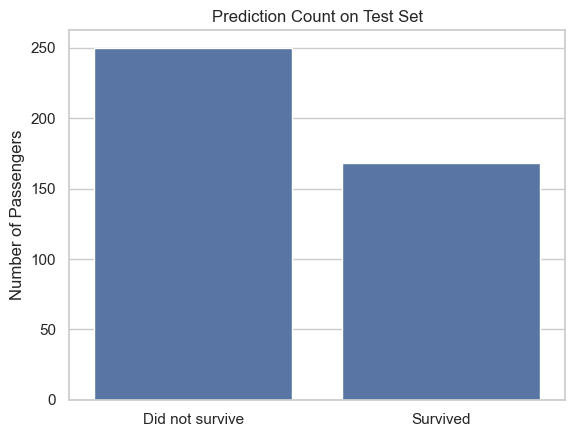

In [83]:
import seaborn as sns

# Predict on test set
test_pred = model.predict(test_df)

sns.countplot(x=test_pred)
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.title("Prediction Count on Test Set")
plt.ylabel("Number of Passengers")
plt.show()


In [85]:
import pandas as pd

results_df = pd.DataFrame({
    'PassengerId': X_val.index,
    'Actual': y_val,
    'Predicted': y_pred
})

print(results_df.head())


     PassengerId  Actual  Predicted
709          709       1          0
439          439       0          0
840          840       0          0
720          720       1          1
39            39       1          1


In [91]:
#for submission
# Save PassengerId before dropping columns
test_passenger_ids = test_df['PassengerId']


submission = pd.DataFrame({
    "PassengerId": test_passenger_ids,  # Extract this from the original test.csv before dropping
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)
